In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv('drive/My Drive/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
data.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [16]:
categorical_col=['male','education','currentSmoker','BPMeds','diabetes','prevalentStroke','prevalentHyp']
continues_col=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

Heart deases 


y= >'TENYearCHD'

#Handling Missing Values

In [4]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [27]:
for i in categorical_col:
  data[i].fillna(data[i].mode()[0],inplace=True)

for i in continues_col : 
  data[i].fillna(data[i].mean(),inplace=True)



In [28]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
data['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

Feature selection 

In [31]:
import statsmodels.regression.linear_model as sm 
selected_columns=data.columns[:-1]

def BackwordElimintion (x,y,sl,columns):
  numVar=len(x[0])
  for i in range(0,numVar):
    regressor=sm.OLS(y,x).fit()
    maxVar=max(regressor.pvalues).astype(float)

    if maxVar>sl:
      for j in range(0,numVar-i):
        if regressor.pvalues[j].astype(float)==maxVar:
          x=np.delete(x,j,1)
          columns=np.delete(columns,j)
    
  regressor.summary()
  return x,columns

sl=0.05

features_modeled,selected_columns=BackwordElimintion(data.iloc[:,:-1].values,data.iloc[:,-1].values,sl,selected_columns)

In [32]:
final_data=pd.DataFrame(data=features_modeled,columns=selected_columns)
final_data['target']=data.iloc[:,-1]
final_data.head(0)

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,BMI,heartRate,target


In [33]:
final_data.head(5)

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,BMI,heartRate,target
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,106.0,70.0,26.97,80.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,121.0,81.0,28.73,95.0,0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,127.5,80.0,25.34,75.0,0
3,0.0,61.0,3.0,30.0,0.0,0.0,1.0,0.0,150.0,95.0,28.58,65.0,1
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,0.0,130.0,84.0,23.10,85.0,0


check balanceing 

In [35]:
count_target=final_data.target.value_counts()
count_target

0    3596
1     644
Name: target, dtype: int64

Text(0.5, 1.0, 'Records in each class')

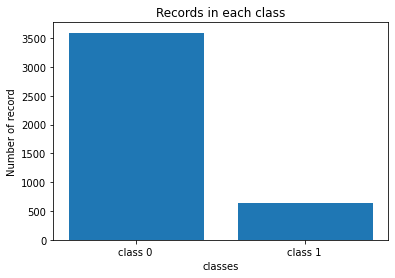

In [36]:
x=[1,2]
plt.bar(x,count_target)
plt.xticks(x,['class 0 ','class 1 '])
plt.xlabel('classes')
plt.ylabel('Number of record')
plt.title("Records in each class")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

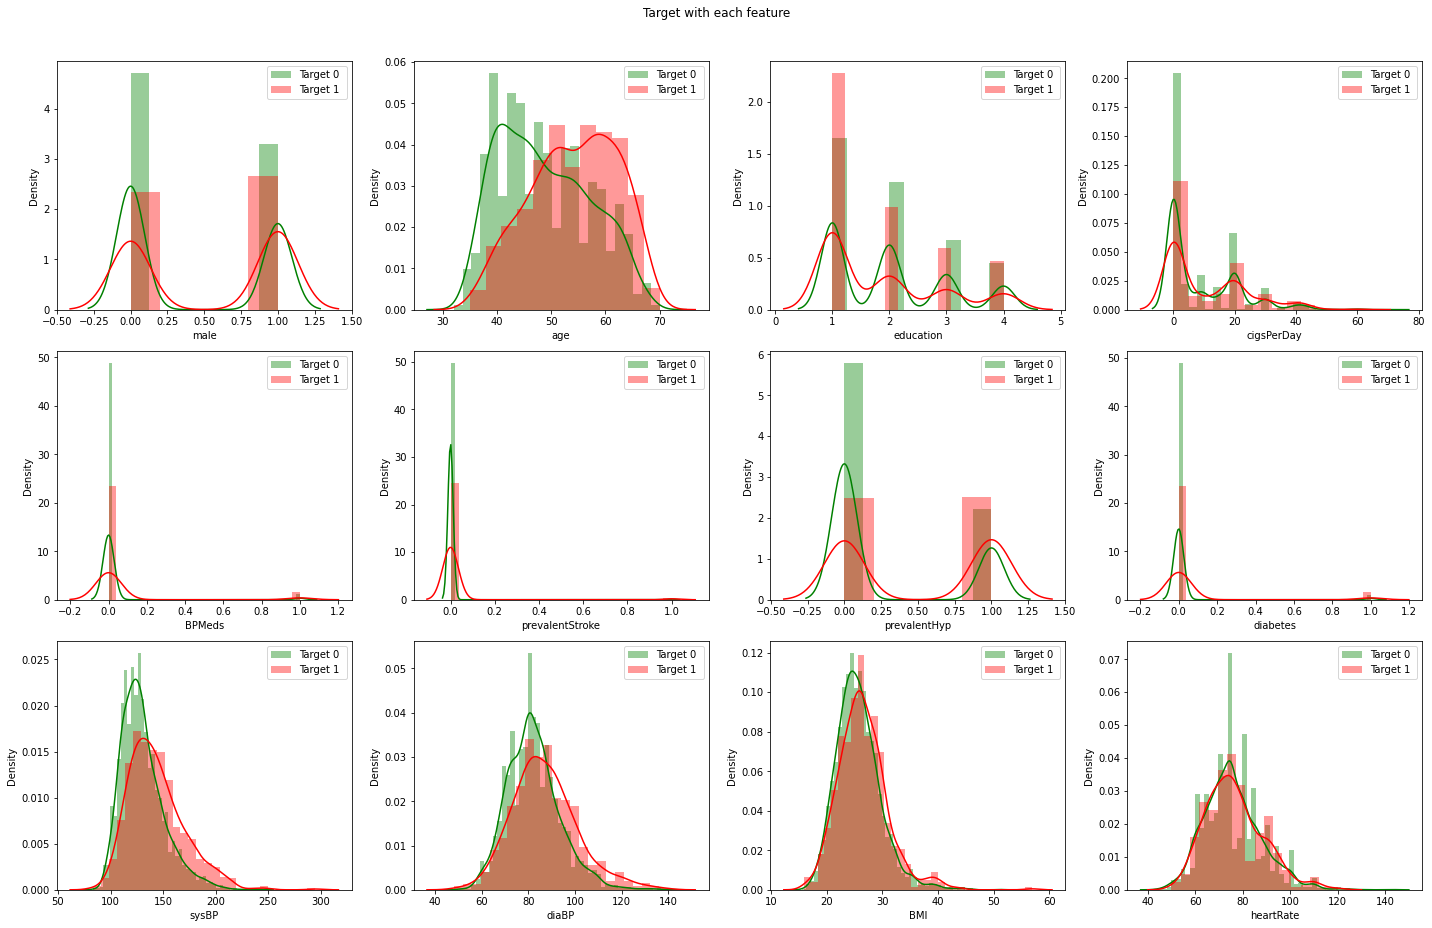

In [40]:
fig=plt.figure(figsize=(20,25))
j=0
for i in final_data.columns:
  if i=='target':
    break
  plt.subplot(6,4,j+1)
  j+=1

  sns.distplot(final_data[i][final_data['target']==0],color='g',label='Target 0 ')
  sns.distplot(final_data[i][final_data['target']==1],color='r',label='Target 1 ')
  plt.legend(loc='best')

fig.suptitle('Target with each feature')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [43]:
X=final_data.iloc[:,:-1].values
y=final_data.iloc[:,-1].values

In [44]:
from collections import Counter
print('Before oversampling count of label  ; {} '.format(Counter(y)))

Before oversampling count of label  ; Counter({0: 3596, 1: 644}) 


In [46]:
from imblearn.over_sampling import SVMSMOTE
sm=SVMSMOTE()
X_res,y_res=sm.fit_sample(X,y.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [47]:
print('After oversampling count of label  ; {} '.format(Counter(y_res)))

After oversampling count of label  ; Counter({0: 3596, 1: 3596}) 


In [48]:
from sklearn.model_selection import train_test_split

train_X,train_y,test_X,test_y=train_test_split(X_res,y_res,test_size=0.2)